Before this script can be executed, please follow the steps in /Data/C_Elegans/README.txt

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import os
import colorsys
import imageio as io

In [2]:
num_samples = 750

In [3]:
data_path = '../Data/C_Elegans/'

In [4]:
images = []
for element in os.listdir(data_path + 'Original/'):
    if element[-4:] == ".png":
        im = io.imread(data_path + 'Original/' + element)
        if im.shape[0] != 430 or im.shape[1] != 430:
            image = np.zeros((430,430))
            image[:im.shape[0],:im.shape[1]] = im
        else:
            image = im
        images.append(image)
images = np.stack(images,0)

In [5]:
if len(images) != 97:
    raise Exception('Wrong length of data. Please make sure you followed the README.txt in the directory /Data/C_Elegans/')

In [6]:
def create_real_image():
    im       = np.copy(images[int(random.random()*images.shape[0])])
        
    x        = int(random.random()*(im.shape[0] - 256))
    y        = int(random.random()*(im.shape[1] - 256))
    image    = im[x:x+256,y:y+256]
    image    = np.expand_dims(image,-1)
    
    if random.random() < 0.5:
        image = image.transpose([1,0,2])        
    
    r = random.random()
    if r > 0.25:
        image = np.rot90(image,1)
        if r > 0.5:
            image = np.rot90(image,1)
            if r > 0.75:
                image = np.rot90(image,1)
        
    return image[:,:,0].astype(np.uint8)

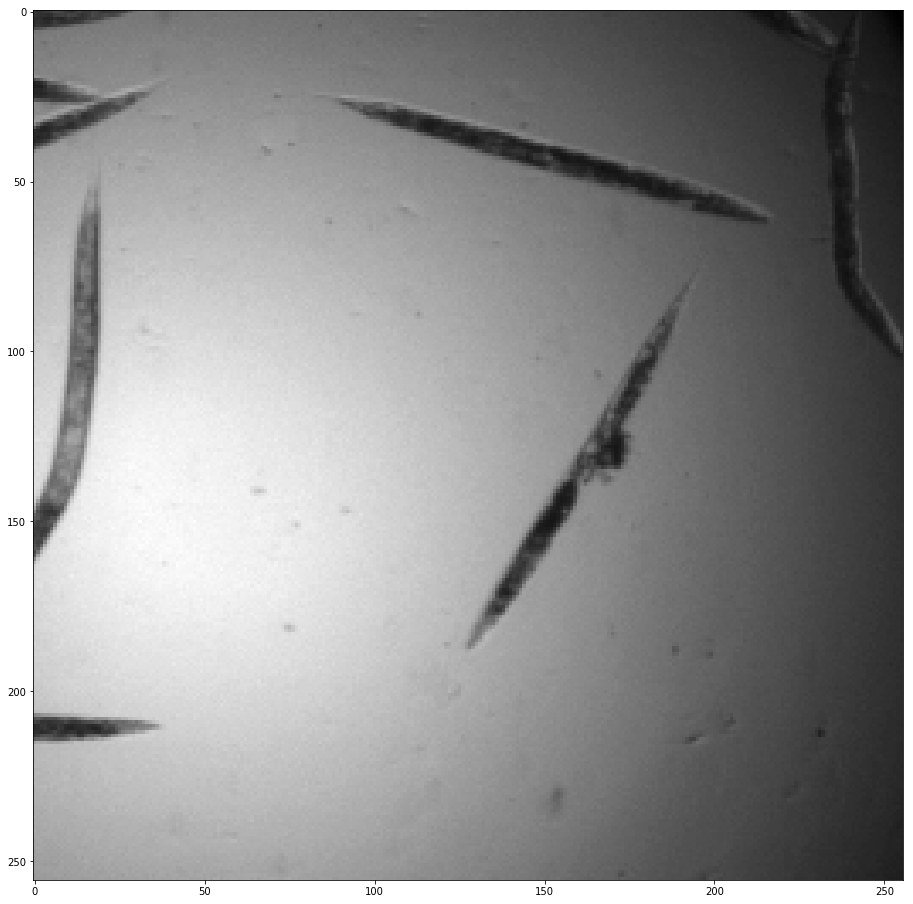

In [7]:
plt.figure(figsize=(16,16))
plt.imshow(create_real_image(),cmap='gray')
plt.show()

In [8]:
for i in range(num_samples):
    io.imsave(data_path+'Raw/'+str(i).zfill(4)+'.png',create_real_image())